<h1 align="center"><strong>Project 6: Titanic Machine Learning Classification</strong></h1>

<h2 align="center"><strong>Roderick L. Alabado</strong></h2>

<h3 align="center">BSIT-3A</h3>

<h1> BASIC OF MACHINE LEARNING </h1>

<h1> Step 1: Import Libraries </h1>


In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


<h1> Step 2: Load Dataset </h1>


In [2]:
df = pd.read_csv('datasets//Titanic.csv')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1> Step 3: Explore Dataset </h1>


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1> Step 4: Handle Missing Values </h1>


In [5]:
# Check missing
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill missing Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<h1> Step 5: Select Features </h1>


In [7]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'


<h1> Step 6: Encode Categorical Features </h1>


In [8]:
df_encoded = df.copy()

label = LabelEncoder()
df_encoded['Sex'] = label.fit_transform(df['Sex'])
df_encoded['Embarked'] = label.fit_transform(df['Embarked'])


In [9]:
df_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


<h1> Step 7: Create X and y Variables </h1>


In [10]:
X = df_encoded[features]
y = df_encoded[target]


<h1> Step 8: Train-Test Split </h1>


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


<h1> Step 9: Train Logistic Regression Model </h1>


In [12]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


<h1> Step 10: Make Predictions </h1>


In [13]:
y_pred = model.predict(X_test)


<h1> Step 11: Model Evaluation </h1>


<h1>Accuracy </h1>

In [14]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8100558659217877

<h1>Classification Report </h1>

print(classification_report(y_test, y_pred))


<h1>Confusion Matrix </h1>

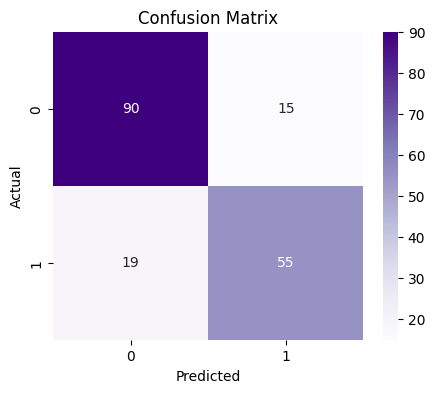

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 <h1>Survival Count </h1>

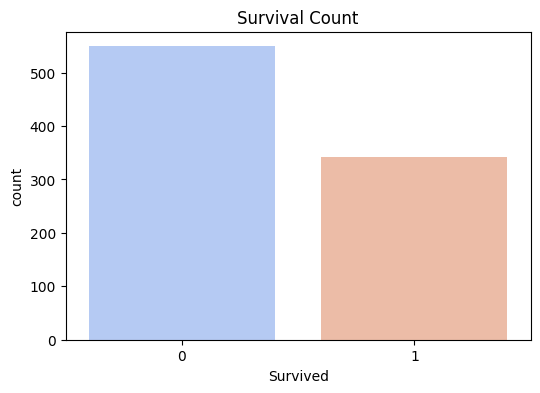

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', palette='coolwarm')
plt.title("Survival Count")
plt.show()


<h1>Survival by Gender  </h1>

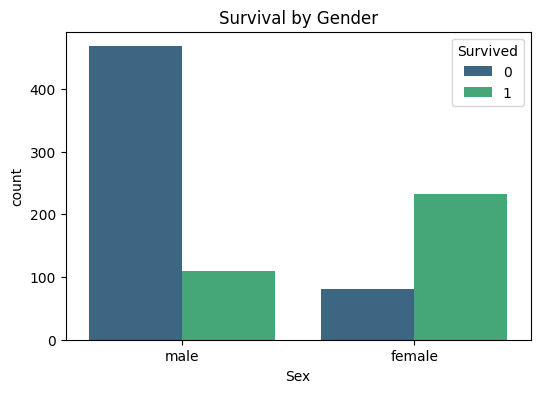

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis')
plt.title("Survival by Gender")
plt.show()


 <h1>Survival by Passenger Class </h1>

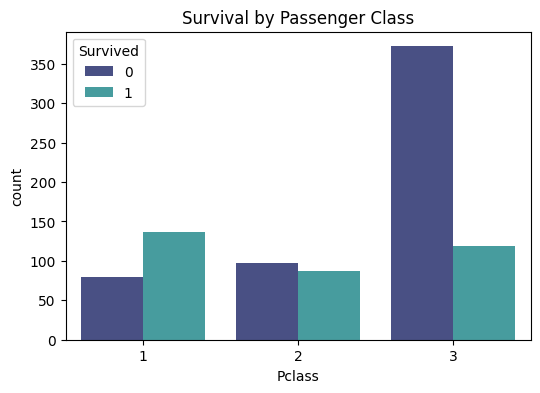

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='mako')
plt.title("Survival by Passenger Class")
plt.show()


  <h1>Age Distribution by Survival </h1>

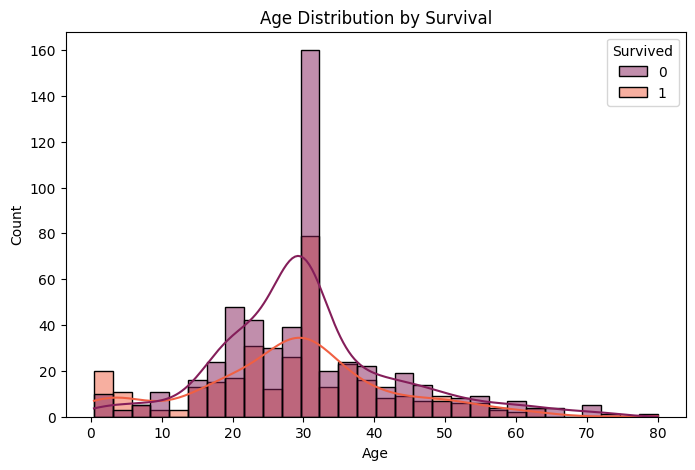

In [19]:

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette='rocket')
plt.title("Age Distribution by Survival")
plt.show()
